# Lineare Regression

In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Daten einlesen

In [14]:
csv_path = "../bottle_data.csv"
df = pd.read_csv(csv_path)

# Features: Füllstände der Dispenser
X = df[["red_fill_level_grams", "blue_fill_level_grams", "green_fill_level_grams"]].astype(float)
# Zielvariable: Endgewicht
y = df["final_weight"].astype(float)

# Fehlende Werte entfernen
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print(X.head())
print(y.head())

   red_fill_level_grams  blue_fill_level_grams  green_fill_level_grams
1            212.326459             699.367282              800.929362
4            211.123260             687.477049              800.592108
5            209.922038             674.893576              800.873228
6            209.295286             662.622660              800.797391
7            208.142019             649.551902              800.691589
1    20.215037
4    22.345867
5    21.241239
6    21.371723
7    22.306694
Name: final_weight, dtype: float64


# Pairplot - Visualisierung - Füllstände


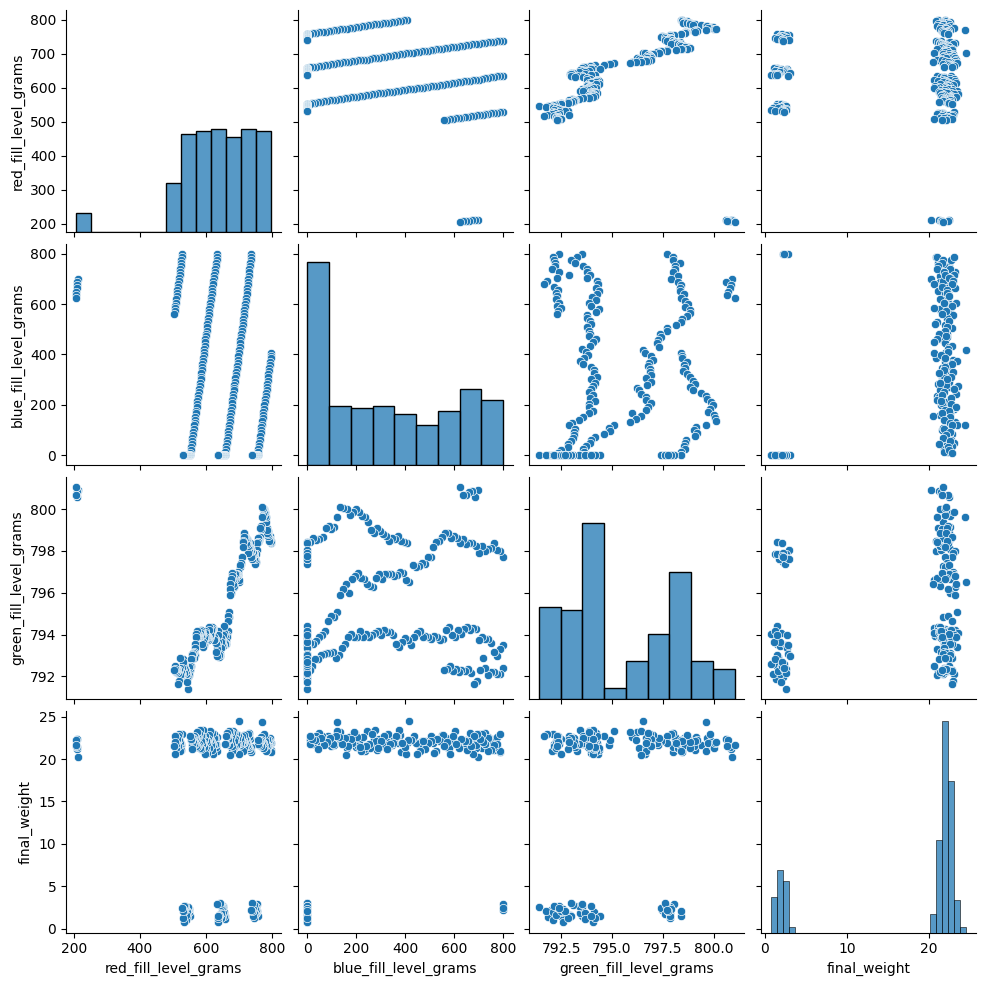

In [15]:
pairplot_df = df[["red_fill_level_grams", "blue_fill_level_grams", "green_fill_level_grams", "final_weight"]].dropna()

sns.pairplot(pairplot_df)
plt.show()

# Daten Trainieren

In [16]:

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell trainieren
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Vorhersage auf Testdaten

In [17]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Koeffizienten:", model.coef_)
print("Intercept:", model.intercept_)


# DataFrame mit echten und vorhergesagten Werten
vergleich = pd.DataFrame({
    "real": y_test.values,
    "vorhergesagt": y_pred
})

print(vergleich.head(10)) 


Mean Squared Error: 52.570737702612504
R^2 Score: 0.20857597318508103
Koeffizienten: [0.00400699 0.01836437 0.47801046]
Intercept: -371.5714153003523
        real  vorhergesagt
0  22.310730     15.108337
1  21.691623     23.623845
2  22.191541     15.819678
3  24.512291     19.654361
4  21.629769     21.847559
5  21.828725     16.560680
6  21.754130     12.547762
7  23.101599     15.565995
8  20.832647     20.340608
9  22.376687     22.164599


# Optimiert mit mehr Datenpunkte

# Daten auslesen

In [18]:
csv_path = "../bottle_data.csv"
df = pd.read_csv(csv_path)

X = df[
    [
        "red_fill_level_grams", "blue_fill_level_grams", "green_fill_level_grams",
        "red_vibration_index", "blue_vibration_index", "green_vibration_index"
    ]
].astype(float)

y = df["final_weight"].astype(float)

mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Visualisierung

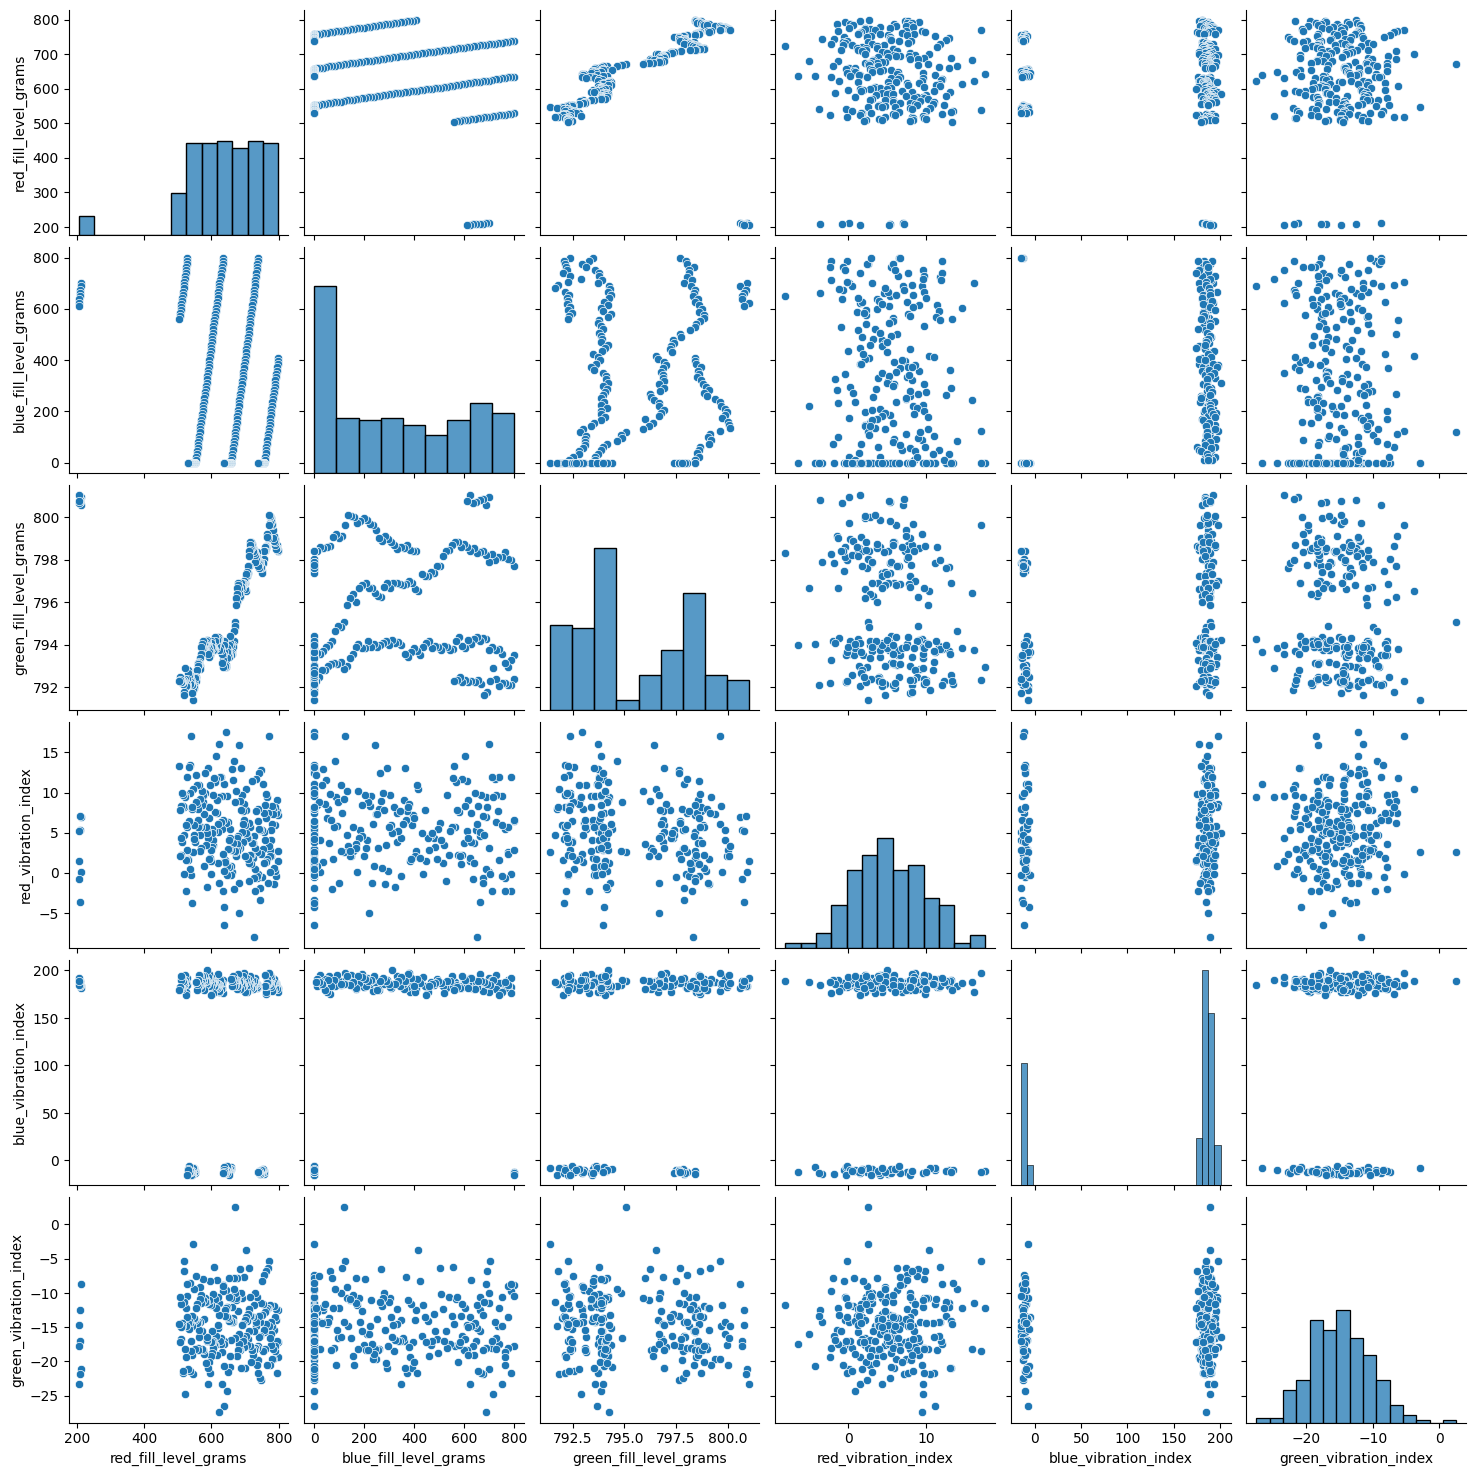

In [19]:
pairplot_df = df[[
        "red_fill_level_grams", "blue_fill_level_grams", "green_fill_level_grams",
        "red_vibration_index", "blue_vibration_index", "green_vibration_index"
    ]].dropna()

sns.pairplot(pairplot_df)
plt.show()

# Trainieren

In [20]:

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell trainieren
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Vorhersage

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Koeffizienten:", model.coef_)
print("Intercept:", model.intercept_)

vergleich = pd.DataFrame({
    "real": y_test.values,
    "vorhergesagt": y_pred
})

print(vergleich.head(10)) 

Mean Squared Error: 0.11389721137383912
R^2 Score: 0.9982853390763053
Koeffizienten: [0.00056273 0.00047331 0.03081277 0.07870999 0.09968109 0.07766356]
Intercept: -20.91917477205175
        real  vorhergesagt
0  22.310730     22.351675
1  21.691623     21.652371
2  22.191541     22.126325
3  24.512291     23.617921
4  21.629769     21.924530
5  21.828725     21.947711
6  21.754130     21.708588
7  23.101599     23.008068
8  20.832647     20.592091
9  22.376687     22.119143


# Mit X.csv Model testen

In [ ]:
# 1. X.csv einlesen
X_new = pd.read_csv("../X.csv")

# 2. Die Features so auswählen, wie du sie beim Training genutzt hast
features = [
    "fill_level_grams_red", "fill_level_grams_blue", "fill_level_grams_green",
    "vibration_index_red", "vibration_index_blue", "vibration_index_green"
]
X_testdata = X_new[features].astype(float)

# Spaltennamen an die Trainingsdaten anpassen
rename_dict = {
    "fill_level_grams_red": "red_fill_level_grams",
    "fill_level_grams_blue": "blue_fill_level_grams",
    "fill_level_grams_green": "green_fill_level_grams",
    "vibration_index_red": "red_vibration_index",
    "vibration_index_blue": "blue_vibration_index",
    "vibration_index_green": "green_vibration_index"
}
X_testdata = X_testdata.rename(columns=rename_dict)

# 3. Vorhersage mit dem trainierten Modell
y_pred_new = model.predict(X_testdata)

# 4. Ergebnis-DataFrame bauen und speichern
ergebnis = pd.DataFrame({
    "Flaschen ID": X_new["bottle"],
    "y_hat": y_pred_new
})

ergebnis["y_hat"] = ergebnis["y_hat"].clip(lower=0)
ergebnis.to_csv("vorhersage_X.csv", index=False)

#ergebnis.to_csv("reg_137812783128.csv", index=False)
print(ergebnis.head())

KeyError: 'vorhergesagtes Gewicht'